In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import joblib  # For saving and loading the model

In [2]:
engineered_df = pd.read_csv("./Data/churn_amazon_prime_users.csv" )
engineered_df

,User ID,Name,Email Address,Username,Date of Birth,Location,Membership Start Date,Membership End Date,Payment Information,Renewal Status,...,Uses_Tablet,Uses_Smart TV,Genre_['Documentary'],Genre_['Horror'],Genre_['Comedy'],Genre_['Action'],Genre_['Drama'],Genre_['Sci-Fi'],Genre_['Romance'],Churned
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Rebeccachester,2024-01-15,2025-01-14,Mastercard,Manual,...,0,1,1,0,0,0,0,0,0,1
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Mcphersonview,2024-01-07,2025-01-06,Visa,Manual,...,0,0,0,1,0,0,0,0,0,1
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Youngfort,2024-04-13,2025-04-13,Mastercard,Manual,...,0,1,0,0,1,0,0,0,0,0
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Feliciashire,2024-01-24,2025-01-23,Amex,Auto-renew,...,0,1,1,0,0,0,0,0,0,0
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Port Deborah,2024-02-14,2025-02-13,Visa,Auto-renew,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Smithport,2024-01-25,2025-01-24,Visa,Auto-renew,...,0,0,0,0,1,0,0,0,0,0
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Ethanport,2024-03-03,2025-03-03,Amex,Manual,...,0,1,0,0,1,0,0,0,0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Alexandraborough,2024-02-09,2025-02-08,Visa,Manual,...,1,0,1,0,0,0,0,0,0,0
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Williammouth,2024-02-18,2025-02-17,Visa,Manual,...,0,0,0,0,1,0,0,0,0,0


# 1. Exploratory Data Analysis (EDA)

c:\Users\lualg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


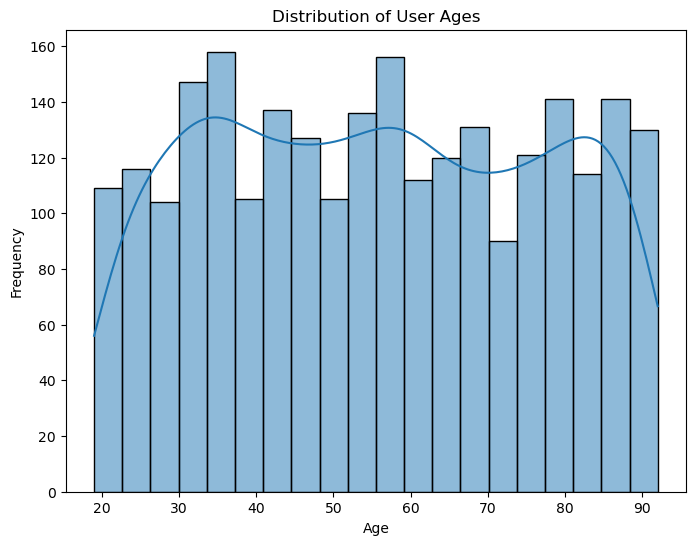

<Figure size 640x480 with 0 Axes>

In [3]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(engineered_df['Age'], bins=20, kde=True)
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Save the figure
plt.savefig("./Graphs/Histogram_Age.png")  # Saves as PNG (default)

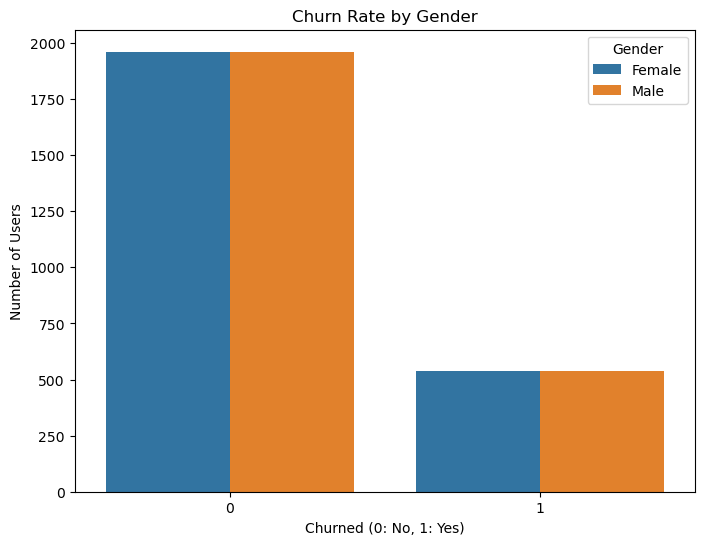

<Figure size 640x480 with 0 Axes>

In [4]:
# Melt the gender columns to have a single 'Gender' column
gender_df = engineered_df[['Churned', 'Gender__Female', 'Gender__Male']].melt(
    id_vars='Churned', value_vars=['Gender__Female', 'Gender__Male'],
    var_name='Gender_Column', value_name='Value'
)

# Create a new 'Gender' column based on the melted data
gender_df['Gender'] = gender_df['Gender_Column'].apply(lambda x: 'Female' if x == 'Gender__Female' else 'Male')

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Churned', hue='Gender', data=gender_df)  # Use the new 'Gender' column
plt.title("Churn Rate by Gender")
plt.xlabel("Churned (0: No, 1: Yes)")
plt.ylabel("Number of Users")
plt.show()

# Save the figure
plt.savefig("./Graphs/Countplot_gender.png")  # Saves as PNG (default)

# 2. Churn Analysis

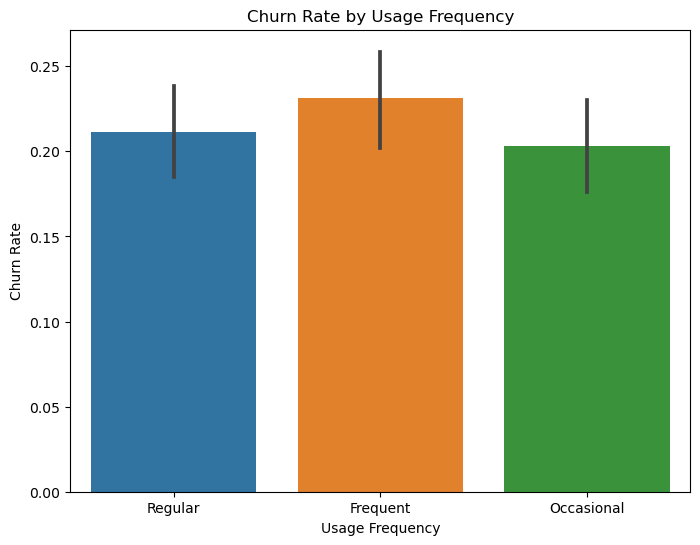

<Figure size 640x480 with 0 Axes>

In [5]:
# Bar plot of Churn Rate by Usage Frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='Usage Frequency', y='Churned', data=engineered_df)
plt.title("Churn Rate by Usage Frequency")
plt.xlabel("Usage Frequency")
plt.ylabel("Churn Rate")
plt.show()

# Save the figure
plt.savefig("./Graphs/Barplot_Usage.png")  # Saves as PNG (default)

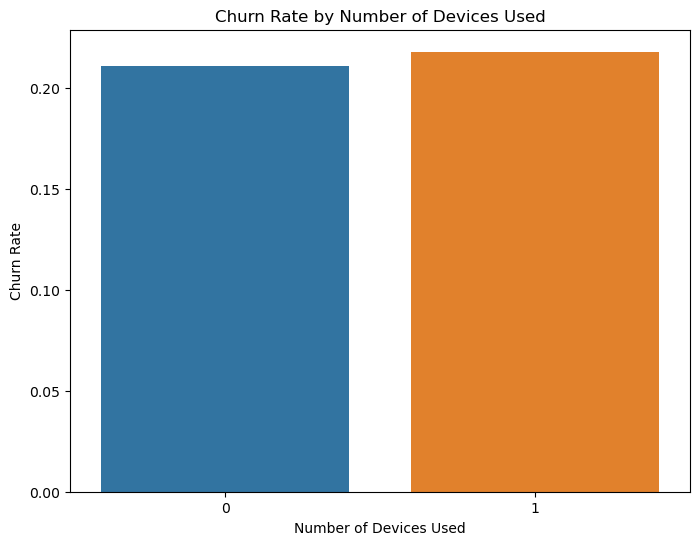

<Figure size 640x480 with 0 Axes>

In [7]:
engineered_df['Number_of_Devices'] = engineered_df[['Uses_Mobile', 'Uses_Desktop', 'Uses_Tablet', 'Uses_Smart TV']].sum(axis=1)

# Plotting (rates)
churn_by_num_devices = engineered_df.groupby('Number_of_Devices')['Churned'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Number_of_Devices', y='Churned', data=churn_by_num_devices)
plt.title("Churn Rate by Number of Devices Used")
plt.xlabel("Number of Devices Used")
plt.ylabel("Churn Rate")
plt.show()

# Save the figure
plt.savefig("./Graphs/Barplot_devices.png")  # Saves as PNG (default)

# 3. Model Performance Visualization (assuming you have a trained model)

In [8]:
engineered_df = pd.read_csv("./Data/churn_amazon_prime_users.csv" )
# Assuming 'Churned' is your target variable
X = engineered_df.drop(['Churned','User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Location', 'Membership Start Date', 'Membership End Date',
       'Payment Information', 'Renewal Status', 'Usage Frequency',
       'Purchase History', 'Favorite Genres', 'Devices Used',
       'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions', 'Membership Duration (Days)', 'Age',
       'Days Since Membership Start'], axis=1)  # Drop the 'Name' column
y = engineered_df['Churned']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Load the saved model 
loaded_model = joblib.load('./TrainedModel/churn_prediction_model.joblib')

In [10]:
# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

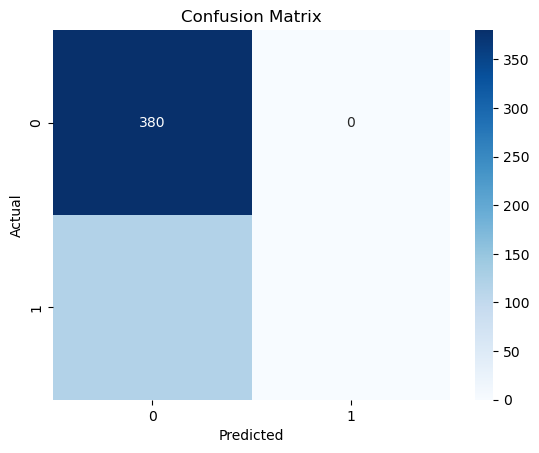

<Figure size 640x480 with 0 Axes>

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the figure
plt.savefig("./Graphs/Heatmap.png")  # Saves as PNG (default)

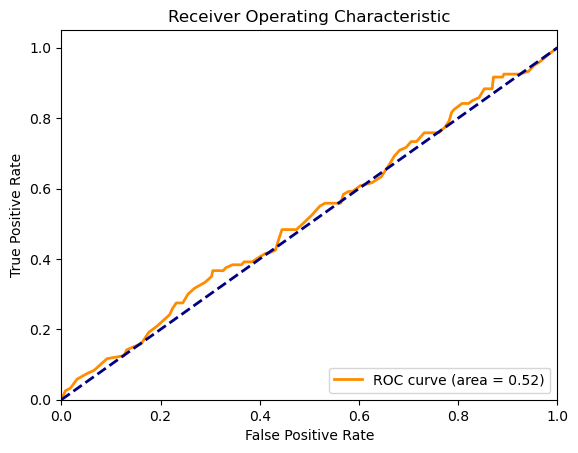

<Figure size 640x480 with 0 Axes>

In [12]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, loaded_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Save the figure
plt.savefig("./Graphs/ROC_curve.png")  # Saves as PNG (default)